# AM5340: Stochastic Processes in Mechanics
## ME20B087: Janmenjaya Panda
## Problem 16 (Lake Eutrophication Model)
<b>Platform:</b><br>
The lake eutrophication model is a well studied model in ecology which shows multistability. The deterministic 1D model shows bistable states of high phosphorous content (eutrophic state) and low phosphorous content (oligotrophic state) in lakes. The equation of motion is given by:
$$ \dot{x} = c - sx + r\frac{x^q}{x_o^q+x^q}$$ 
The parameters for this system can be taken as $s = 1$, $r = 1$, $x_o = 1$, $q = 8$ and $c = 0.53$. The noise free system has two equilibria (where $\dot{x} = 0$) at $x = 0.537$ and at $x = 1.491$ corresponding to oligotrophic states and eutrophic states. Assume that there exists an additive noise term $\epsilon\zeta(t)$ on the RHS of equation to model the uncertainties, where $\epsilon> 0$ is a constant and $\zeta(t)$ is a stationary Gaussian noise.

In [102]:
# Import req. Libraries
import numpy as np
import math
from IPython.display import display, Latex
import warnings
import chaospy as cp
import sympy as sp
import matplotlib.pyplot as plt
import time
%matplotlib inline

### 1. Plot the time histories of the response for the deterministic system with arbitrary initial conditions. Comment on your observations.

In [2]:
# Variables
t = sp.symbols('t');
x = sp.Function('x')(t);

In [90]:
# Parameters
c = 0.53;
s = 1;
r = 1;
q = 8;
xo = 1;

In [91]:
# ICS
X0 = 1;

In [ ]:
# Differntial Equation
deqn = sp.Eq(-sp.diff(x,t)+c-s*x+(r*x^q)/(xo^q+x^q))

In [5]:
# Solve differntial eqn analytically
f = sp.dsolve(deqn, 
        dvar = x,
        ics = [0,1],
        ivar = t);
f

TypeError: unable to make sense of Maxima expression '-100*integrate((x(_SAGE_VAR_t)^8+1)/(100*x(_SAGE_VAR_t)^9-153*x(_SAGE_VAR_t)^8+100*x(_SAGE_VAR_t)-53),x(_SAGE_VAR_t))=_SAGE_VAR_t-100*(at(integrate((x(_SAGE_VAR_t)^8+1)/(100*x(_SAGE_VAR_t)^9-153*x(_SAGE_VAR_t)^8+100*x(_SAGE_VAR_t)-53),x(_SAGE_VAR_t)),x(_SAGE_VAR_t)=0))' in Sage

As shown above, it turns out that solving analytically using sagemath or sympy for any ICS is quite difficult as it throws TypeError: unable to make sense of Maxima expression. So we'll try to solve it numerically. We will use <b>Runge Kutta Method</b>, which is useful to solve the differential equations of type: $$\frac{dy}{dx} = f(y,x); y(x_0) = y_0$$.<br > The method can be described shortly as follows: <br >
$$y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$
$$x_{n+1} = x_n +h $$, where
$$k_1 = f(y_n,x_n)$$
$$k_2 = f(y_n + \frac{k_1}{2},x_n + \frac{h}{2})$$
$$k_3 = f(y_n + \frac{k_2}{2},x_n + \frac{h}{2})$$
$$k_1 = f(y_n + h,x_n + h)$$
<br>
In our case, we have $$\frac{dx}{dt} = c - sx + r\frac{x^8}{x_o^8 + x^8}; x(0) = x_0$$ 
Hence f(t,x) is purely a function of x, which makes life a lot easier. <br>
<br> 
<b>Reference:</b> <a href="https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods">Runge Kutta Method</a>


In [72]:
# Define the differential equation
def dx_dt(x, t, X0):
    c = float(0.53);
    s = float(1);
    r = float(1);
    q = float(8);
    xo = float(1);
    return c - s*x + r*x**8 / (xo**8 + x**8);


# Define the fourth-order Runge-Kutta method
def runge_kutta_4th_order(f, t, h, X0):
    n = len(t);
    x = np.zeros(n);
    x[0] = X0;

    for i in range(n - 1):
        k1 = f(x[i], t[i], X0);
        k2 = f(x[i] + 0.5 * k1, t[i] + 0.5 * h, X0);
        k3 = f(x[i] + 0.5 * k2, t[i] + 0.5 * h, X0);
        k4 = f(x[i] + k3, t[i] + h, X0);
        x[i + 1] = x[i] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6;
        
    return x;

Enter the time range:10


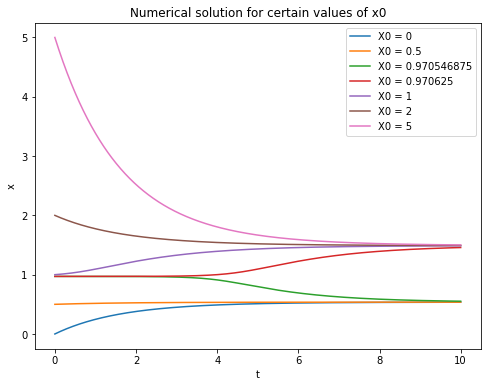

In [73]:
# Get the Time Range
T = int(input('Enter the time range:'));

# Define the Time Sample Points
t = np.linspace(0, T, T*100);

# Define the step size (e.g., h = 0.1)
h = 1/100;

# Define different values of ICS "x0"
X0_values = [0, 0.5, 0.970546875, 0.970625, 1, 2, 5];

# Solve the equation using the fourth-order Runge-Kutta method for each "x0" value and plot the solutions
for X0 in X0_values:
    # Solve the equation numerically using the fourth-order Runge-Kutta method
    x = runge_kutta_4th_order(dx_dt, t, h, X0);

    # Plot the solution
    plt.figure(1).set_figwidth(8);
    plt.figure(1).set_figheight(6);
    plt.plot(t, x, label=f'X0 = {X0}');

# Set the plot title and labels
plt.title("Numerical solution for certain values of x0");
plt.xlabel("t");
plt.ylabel("x");

# Add a legend
plt.legend();

# Show the plot
plt.show();

<b>Observation:</b> As we can observe, there are two equilibrium states, i.e. $X_{eqb} = 0.537$ and $1.491$, where the final $X_eqb$ being dependent of specific value of  $X_0$. When $X_0 <= 0.970546875$, it being the former & for $X0 >=0.970625$, it be the latter. So the transition state lies between these two values. <br >
<b>Physical Observation:</b> Here Symbols have the physical meaning as follows:
<ol>
    <li> x: the Phosphorus content in the lake </li>
    <li> c: the rate of phosphorus input from the watershed </li>
    <li> s: the rate of phosphorus loss </li>
    <li> r: the maximum rate of phosphorus recycling </li>
    <li> $x_o$: the phosphorus value at which the half-maximum rate of recycling occurs </li>
    <li> q: the steepness of the switch occuring around $x_o$
</ol>
It can be noted that around the boundary region of the segmentation, noises and time delays present in lake eutrophication systems can induce transitions between two stable states. <br>

<b>Reference:</b> <a href="https://www.researchgate.net/publication/318176044_Stochastic_ecological_kinetics_of_regime_shifts_in_a_time-delayed_lake_eutrophication_ecosystem">Stochastic ecological kinetics of regime shifts in a time-delayed lake eutrophication ecosystem</a>

### 2. Assume a suitable PSD for $\zeta(t)$ and simulate time histories of it. Plot a few sample time histories and show that the simulated time histories match the target pdf and the target PSD.

For a given autoCorrelation function $R_{XX}(\tau)$, the PSD is given by:
$$S_{XX}(\omega) = \int_{-\infty}^{\infty}{R_{XX}(\tau)e^{i\omega\tau} d\tau}$$
We use <b>Shinozuka's Approach</b>, which essentially relies on the fact that a random process can be simulated by a series of cosine functions with random frequency.

For any given PSD $S_0(\omega)$,a gaussian function $f({\boldsymbol{x}})$ can be written as:
$$f({\boldsymbol{x}})=\sqrt{2}\sum_{k_1=1}^{N_1}\sum_{k_2=1}^{N_2}\sum_{k_3=1}^{N_3} \dots \sum_{k_n=n}^{N_n}{A(\boldsymbol{\omega_k}) cos(\boldsymbol{\omega_k '} \cdot \boldsymbol{x} + \phi_k)}$$
where $A(\boldsymbol{\omega_k}) = \sqrt{S_0(\boldsymbol{\omega}) \Delta \boldsymbol{\omega}} = (S_0(\omega_{1k_1},\omega_{2k_2} \dots \omega_{nk_n}) \Delta\omega_1 \Delta\omega_2 \dots \Delta\omega_n )^{\frac{1}{2}}$ <br>
$\phi_k = \phi_{k_1k_2\dots k_n}:$ independent random phase uniformly distributed between 0 and $2\pi$.<br>
$\Delta\omega_i = \frac{\omega_{iu} - \omega_{1l}}{N_i}$<br>
$N_i:$the number of intervals along the ith axis of the wave number domain.<br>
<br>$\omega_{ik_i} = \omega_{il} + (k_i - 0.5)\Delta\omega_i;$ $k_i = 1, 2, 3 \dots N_i;$ $i = 1,2,3 \dots n$
<br>$\omega_{ik_i}' = \omega_{ik_i} + \delta\omega_i;$ $k_i = 1, 2, 3 \dots N_i;$ $i = 1,2,3 \dots n$, in which $\delta\omega_i$ is a small random frequency introduced to avoid the the periodicity of the simulated process, and is uniformly distributed between $-\Delta\omega_i' /2$ and $\Delta\omega_i' /2$. <br><br>
Here we will be simulating for $i=1$, hence we will deal with $k$ being varying from $1$ to $N$ and single $\Delta\omega$ ($:=\frac{\omega_u - \omega_l}{N}$).

Let's consider a signal having PSD:
    $$\boldsymbol{S_0(\omega) = [tan^{-1}\frac{\omega_o}{\alpha}]^{-1} \frac{\alpha}{\omega^2 + \alpha^2}}$$ <br>
where $\omega_o = 12\pi$ and $\alpha = 4$. So $f(t)$ (or $\zeta(t)$) becomes as follows:
$$f(t) = \sqrt{\frac{2}{N}}\sum_{k=1}^{N}cos(\omega_{k}t + \phi_k)$$
We are assuming the gaussian noise to have a mean zero.
<br><b>Reference:</b> <a href="https://www.sciencedirect.com/science/article/pii/0022460X72906001">Digital simulation of random processes and its applications</a>

Enter the time range:10


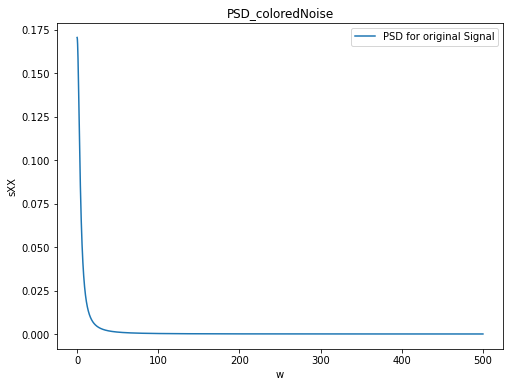

<IPython.core.display.Latex object>

varies from 0 to 500


<IPython.core.display.Latex object>

0.1


<IPython.core.display.Latex object>

0.005
Sampling rate of the freq. domain in k =  5000
Length of generated Signal: 10.0


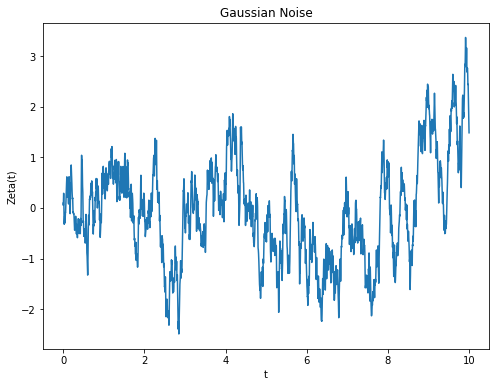

In [74]:
# PSD & Time History Simulation for colored noise

# Limits of Omega
wl = 0;  # Lower limit
wu = 500;  # Upper limit

# Get the Time Range
T = int(input('Enter the time range:'));

# No of sample Points
N = (wu - wl)*T;

# Generate omegas
w = np.linspace(wl, wu, N);

# $\Delta \omega$
delw = (wu - wl)/N;
                                             
w0 = 12*np.pi;
a = 4;
s0 = (1/(math.atan(w0/a)))*(a/(w**2 + a**2));
                            
# Plot the sXX
plt.figure(2).set_figwidth(8);
plt.figure(2).set_figheight(6);
plt.plot(w, s0, label='PSD for original Signal');

# Set the plot title and labels
plt.title("PSD_coloredNoise");
plt.xlabel("w");
plt.ylabel("sXX");

# Add a legend
plt.legend();

# Show the plot
plt.show();  

display(Latex('$\omega$ :'));
print("varies from 0 to", wu);

display(Latex('$\Delta \omega$ :'));
print(delw);

# $\Delta \omega '$
delwd = delw/20;
display(Latex(f'$\Delta \omega d$ :'));
print(delwd);

# k
k = np.arange(1,N+1);
print('Sampling rate of the freq. domain in k = ', max(k));

# Individual \omega_i and \omega'_i
wk = wl + (k - 0.5)*delw;
wkd = wk + np.random.uniform(-delwd/2, delwd/2, len(wk));

# Phase
phi_k = np.random.uniform(0,2*np.pi,len(wk));

# Time sample
t = np.linspace(0,N,N)/wu;
lenSig = max(t);
print('Length of generated Signal:', lenSig);

# A(w)
A = np.sqrt(s0[0:]*delw);

# Reshaping into required form
A = A.reshape(-1,1);
wkd = wkd.reshape(-1,1);
phi_k = phi_k.reshape(-1,1);
t = t.reshape(1,-1);

# wt
v0 = np.matmul(wkd, t);

# A(w)(cos(wt+phi))
v = A*(np.cos(v0 + phi_k));
fx = np.sqrt(2)*np.sum(v, axis = 0);

# Sample Noise
fx_ = fx.reshape(fx.size,1);

# Time Domain
t_ = t.reshape(t.size,1);

# Plot a sample noise
plt.figure(3).set_figwidth(8);
plt.figure(3).set_figheight(6);
plt.plot(t_, fx_, label='Random Noise for given PSD');

# Set the plot title and labels
plt.title('Gaussian Noise');
plt.xlabel("t");
plt.ylabel('Zeta(t)');

# Show the plot
plt.show();

warnings.filterwarnings("ignore", category=DeprecationWarning);

In [75]:
# Define the differential equation incorporating the noise term
def dx_dt_noise(x, t, X0, noise, e):
    c = float(0.53);
    s = float(1);
    r = float(1);
    q = float(8);
    xo = float(1);
    return c - s*x + r*x**8 / (xo**8 + x**8) + e*noise;


# Define the fourth-order Runge-Kutta method in corporating the noise term
def runge_kutta_4th_order_noise(f, t, h, X0, e, noise):
    n = len(t);
    x = np.zeros(n);
    x[0] = X0;

    for i in range(n - 1):
        k1 = f(x[i], t[i], X0, noise[i], e);
        k2 = f(x[i] + 0.5 * k1, t[i] + 0.5 * h, X0, noise[i] + 0.5*h, e);
        k3 = f(x[i] + 0.5 * k2, t[i] + 0.5 * h, X0, noise[i] + 0.5*h, e);
        k4 = f(x[i] + k3, t[i] + h, X0, noise[i] + h, e);
        x[i + 1] = x[i] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6;
    return x;

Enter the value of epsilon:0.05
Enter the initial Value:2


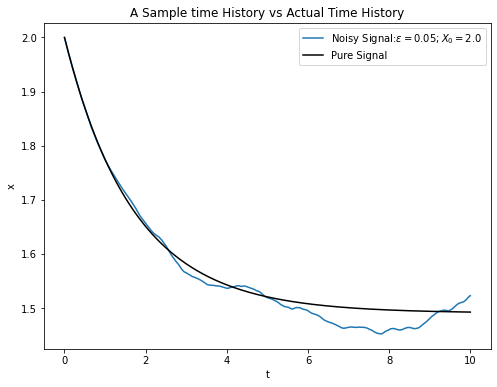

In [76]:
# A sample time history
# Epsilon
e = float(input('Enter the value of epsilon:'));

# ICS
X0 = float(input('Enter the initial Value:'));

# Incremental step in rk4
h = float(t_[-1]/(t_.shape[0]));

# rk4 solution
x = runge_kutta_4th_order(dx_dt, t_, h, X0);

# rk4 solution incorporating the noise term
x_ = runge_kutta_4th_order_noise(dx_dt_noise, t_, h, X0, e, (fx_.T)[0]);

# Plot a sample time history
plt.figure(4).set_figwidth(8);
plt.figure(4).set_figheight(6);
plt.plot(t_.T[0], x_, label=f'Noisy Signal:$\epsilon={e}; X_0={X0}$');
plt.plot(t_.T[0], x, 'black',label='Pure Signal');

# Add legend
plt.legend();

# Set the plot title and labels
plt.title('A Sample time History vs Actual Time History');
plt.xlabel('t');
plt.ylabel('x');

# Show the plot
plt.show()

<b>AutoCorrelation Function $R_{XX}(\tau)$:</b> $E[X(t)X(t-\tau)] = \sum_{\tau}^{T}{X(t_i)X(t_i-\tau)}$<br>
<b>PSD $S_{XX}(\omega):$</b> $\frac{1}{\pi}\int_{0}^{\infty}{R_{XX}(\tau)e^{i\omega \tau}} d\tau$<br>
So we First obtain $R_{XX}(\tau)$ for given value of $\tau$ and then we calculate the PSD of simulated signal from the numerical integration of autoCorrelation Function.

In [77]:
# AutoCorrelation Function
def autoCor(x, lag):
    # E[x(t)x(t-lag)]
    x = np.array(x);
    y = np.array([np.mean(x[:] * x[:])]);
    lc = 1;
    while lc < lag:
        y = np.append(y, np.mean(x[:-lc] * x[lc:]));
        lc += 1;
    return y;

# Riemann Integral Trapizoidal Method
def trapZ(y, stepSize):
    y = np.array(y);
    Area = stepSize*( (y[0]+y[-1])/2 + sum(y[1:-2]));
    return Area;

# Gaussian Distribution
def gaussian(x, mean, variance):
    return (1/(np.sqrt(2*np.pi*variance)))*(np.exp(-0.5*(x-mean)**2/variance));

# Min element of an array
def min_element(a):
    minElement = float(0);
    for i in a:
        minElement = min(minElement,i);
    return minElement;

# Max element of an array
def max_element(a):
    maxElement = 0;
    for i in a:
        maxElement = max(maxElement,i);
    return maxElement;

dt is: [0.0020004]
Maximum lag tau taken is:3
tau in terms of bins: 1499
No of points in AutoCorrleation function is: (1499,)


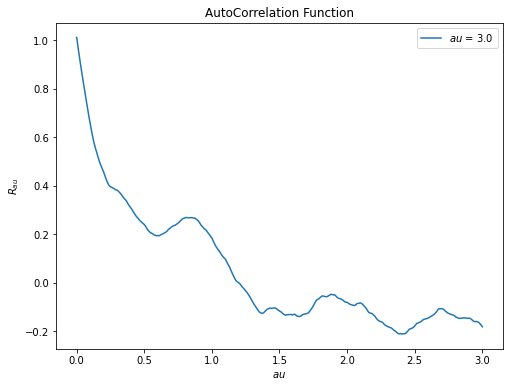

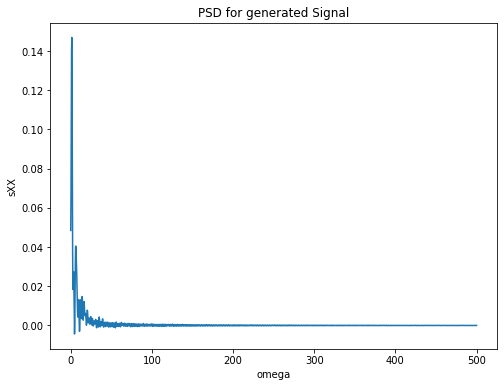

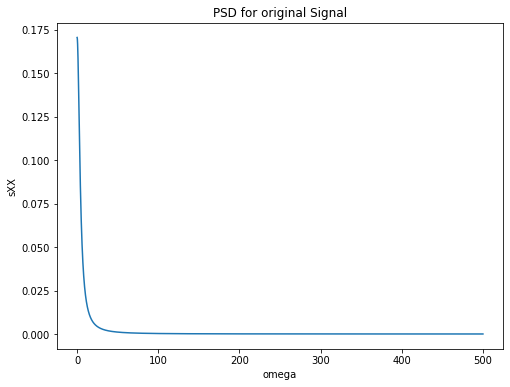

In [78]:
# AutoCorr, PSD and simulated PSD

# \delta t
dt = t_[1] - t_[0];
print('dt is:', dt);

# Tau: the parameter for the autoCorrelation Function
Tau= float(input(f'Maximum lag tau taken is:'));
lag = (int)(Tau//dt);
print('tau in terms of bins:', lag);

# Calculate the autoCorrelation Function
R_tau = autoCor(fx, lag);
print('No of points in AutoCorrleation function is:', R_tau.shape);

# Sample Tau
tau = np.linspace(0, Tau, lag);

# Plot Autocorrelation Function
plt.figure(5).set_figwidth(8);
plt.figure(5).set_figheight(6);
plt.plot(tau, R_tau, label=f'$\tau$ = {Tau}');

# Add legend
plt.legend();

# Set the plot title and labels
plt.title("AutoCorrelation Function");
plt.xlabel("$\tau$");
plt.ylabel("$R_{\tau}$");

# Show the plot
plt.show();

# Domain omega
omega = np.linspace(0,wu,tau.size);

# PSD of Simulated Signal initialization
sXX = np.array([]);

# Numerical Integral
stepSize = tau[1] - tau[0];
for i in omega:
    Integral = R_tau*np.cos(i*tau);
    sXX = np.append(sXX,trapZ(Integral,stepSize));
        
# PSD of Simulated Signal initialization
sXX = sXX/np.pi;

# Plot PSD for Generated Signal
plt.figure(6).set_figwidth(8);
plt.figure(6).set_figheight(6);
plt.plot(omega, sXX);

# Set the plot title and labels
plt.title("PSD for generated Signal");
plt.xlabel("omega");
plt.ylabel("sXX");

# Plot PSD for Original Signal
plt.figure(7).set_figwidth(8);
plt.figure(7).set_figheight(6);
plt.plot(w, s0);

# Set the plot title and labels
plt.title("PSD for original Signal");
plt.xlabel("omega");
plt.ylabel("sXX");

# Show the plot
plt.show();

<b>PDF Comparison</b><br>
Mean of generated Signal is essentially the mean of the datapoints and variance is $R_{XX}[0]$.
On the otherhand, we can generate the ideal distribution from this mean and variance values.

To plot the pdf of original signal we draw a histogram via the frequency table.

mean of generated Signal is: -0.06503992953112084
variance of generated Signal is: 1.0112612451520282


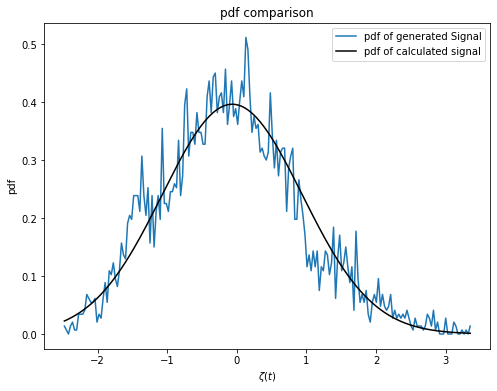

In [79]:
# Comparison with the pdf

# Mean of generated Signal
meanSignal = np.mean(fx_);
print('mean of generated Signal is:', meanSignal);

# Variance of generated Signal
varianceGeneratedSignal = R_tau[0];
print('variance of generated Signal is:', varianceGeneratedSignal);

# Frequency Plot generation for Noise
binsSize = 200;
hist, bins = np.histogram(fx_, bins = binsSize, density = True);
bin_centers = (bins[1:]+bins[:-1])*0.5;

# Plot pdf for calculated Signal
plt.figure(8).set_figwidth(8);
plt.figure(8).set_figheight(6);
plt.plot(bin_centers, hist);

# Pdf of original signal
x = np.linspace(min_element(bin_centers),max_element(bin_centers),binsSize);
xpdf = gaussian(x,meanSignal,varianceGeneratedSignal);
plt.plot(x,xpdf,'black');

# Set the plot title and labels
plt.title("pdf comparison");
plt.xlabel('$\zeta(t)$');
plt.ylabel("pdf");

# Set the legend
plt.legend(['pdf of generated Signal','pdf of calculated signal']);

# Show the plot
plt.show();

### In similar manner, we can also plot for the white noise, which is delta correlated.

Enter the time range:10


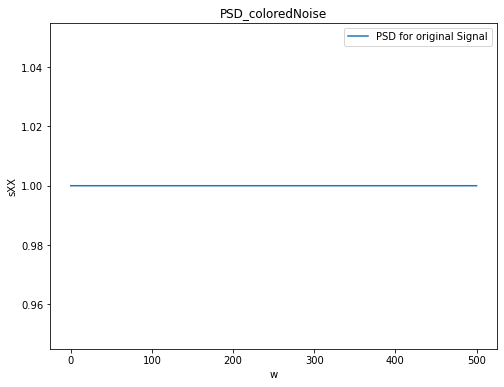

<IPython.core.display.Latex object>

varies from 0 to 500


<IPython.core.display.Latex object>

0.1


<IPython.core.display.Latex object>

0.005
Sampling rate of the freq. domain in k =  5000
Length of generated Signal: 10.0


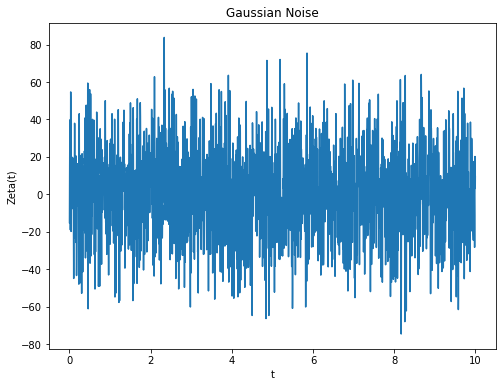

In [80]:
# PSD & Time History Simulation for white noise

# Limits of Omega
wl = 0;  # Lower limit
wu = 500;  # Upper limit

# Get the Time Range
T = int(input('Enter the time range:'));

# No of sample Points
N = (wu - wl)*T;

# Generate omegas
w = np.linspace(wl, wu, N);

# $\Delta \omega$
delw = (wu - wl)/N;
                                             
w0 = 12*np.pi;
a = 4;

# White Noise ideal PSD
s0 = np.linspace(1,1,N);
                            
# Plot the sXX
plt.figure(9).set_figwidth(8);
plt.figure(9).set_figheight(6);
plt.plot(w, s0, label='PSD for original Signal');

# Set the plot title and labels
plt.title("PSD_coloredNoise");
plt.xlabel("w");
plt.ylabel("sXX");

# Add a legend
plt.legend();

# Show the plot
plt.show();  

display(Latex('$\omega$ :'));
print("varies from 0 to", wu);

display(Latex('$\Delta \omega$ :'));
print(delw);

# $\Delta \omega '$
delwd = delw/20;
display(Latex(f'$\Delta \omega d$ :'));
print(delwd);

# k
k = np.arange(1,N+1);
print('Sampling rate of the freq. domain in k = ', max(k));

# Individual \omega_i and \omega'_i
wk = wl + (k - 0.5)*delw;
wkd = wk + np.random.uniform(-delwd/2, delwd/2, len(wk));

# Phase
phi_k = np.random.uniform(0,2*np.pi,len(wk));

# Time sample
t = np.linspace(0,N,N)/wu;
lenSig = max(t);
print('Length of generated Signal:', lenSig);

# A(w)
A = np.sqrt(s0[0:]*delw);

# Reshaping into required form
A = A.reshape(-1,1);
wkd = wkd.reshape(-1,1);
phi_k = phi_k.reshape(-1,1);
t = t.reshape(1,-1);

# wt
v0 = np.matmul(wkd, t);

# A(w)(cos(wt+phi))
v = A*(np.cos(v0 + phi_k));
fx = np.sqrt(2)*np.sum(v, axis = 0);

# Sample Noise
fx_ = fx.reshape(fx.size,1);

# Time Domain
t_ = t.reshape(t.size,1);

# Plot a sample noise
plt.figure(10).set_figwidth(8);
plt.figure(10).set_figheight(6);
plt.plot(t_, fx_, label='Random Noise for given PSD');

# Set the plot title and labels
plt.title('Gaussian Noise');
plt.xlabel("t");
plt.ylabel('Zeta(t)');

# Show the plot
plt.show();

warnings.filterwarnings("ignore", category=DeprecationWarning);

Enter the value of epsilon:0.05
Enter the initial Value:2


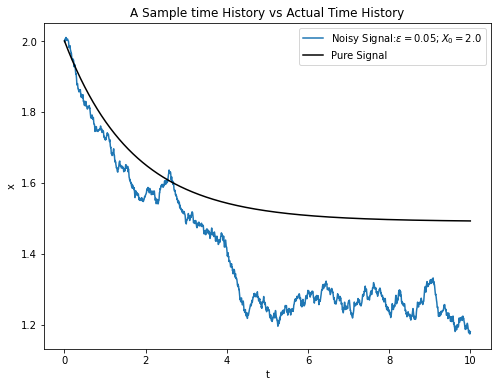

In [81]:
# A sample time history
# Epsilon
e = float(input('Enter the value of epsilon:'));

# ICS
X0 = float(input('Enter the initial Value:'));

# Incremental step in rk4
h = float(t_[-1]/(t_.shape[0]));

# rk4 solution
x = runge_kutta_4th_order(dx_dt, t_, h, X0);

# rk4 solution incorporating the noise term
x_ = runge_kutta_4th_order_noise(dx_dt_noise, t_, h, X0, e, (fx_.T)[0]);

# Plot a sample time history
plt.figure(11).set_figwidth(8);
plt.figure(11).set_figheight(6);
plt.plot(t_.T[0], x_, label=f'Noisy Signal:$\epsilon={e}; X_0={X0}$');
plt.plot(t_.T[0], x, 'black', label='Pure Signal');

# Add legend
plt.legend();

# Set the plot title and labels
plt.title('A Sample time History vs Actual Time History');
plt.xlabel('t');
plt.ylabel('x');

# Show the plot
plt.show()

dt is: [0.0020004]
Maximum lag tau taken is:3
tau in terms of bins: 1499
No of points in AutoCorrleation function is: (1499,)


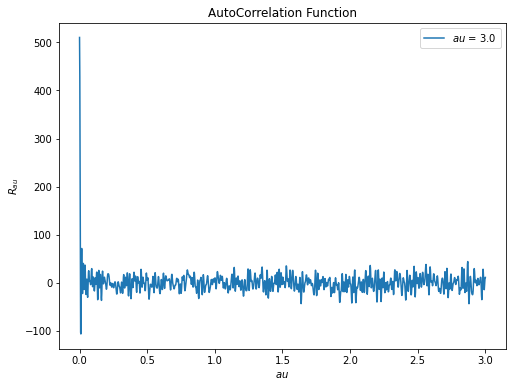

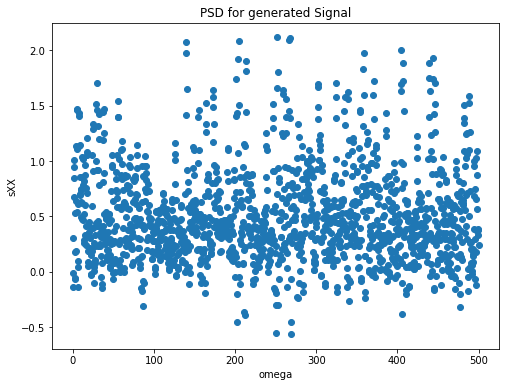

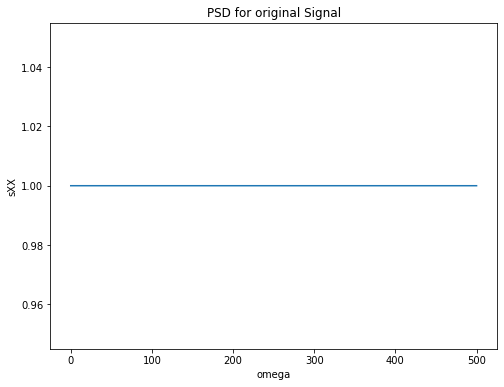

In [82]:
# AutoCorr, PSD and simulated PSD

# \delta t
dt = t_[1] - t_[0];
print('dt is:', dt);

# Tau: the parameter for the autoCorrelation Function
Tau= float(input(f'Maximum lag tau taken is:'));
lag = (int)(Tau//dt);
print('tau in terms of bins:', lag);

# Calculate the autoCorrelation Function
R_tau = autoCor(fx, lag);
print('No of points in AutoCorrleation function is:', R_tau.shape);

# Sample Tau
tau = np.linspace(0, Tau, lag);

# Plot Autocorrelation Function
plt.figure(12).set_figwidth(8);
plt.figure(12).set_figheight(6);
plt.plot(tau, R_tau, label=f'$\tau$ = {Tau}');

# Add legend
plt.legend();

# Set the plot title and labels
plt.title("AutoCorrelation Function");
plt.xlabel("$\tau$");
plt.ylabel("$R_{\tau}$");

# Show the plot
plt.show();

# Domain omega
omega = np.linspace(0,wu,tau.size);

# PSD of Simulated Signal initialization
sXX = np.array([]);

# Numerical Integral
stepSize = tau[1] - tau[0];
for i in omega:
    Integral = R_tau*np.cos(i*tau);
    sXX = np.append(sXX,trapZ(Integral,stepSize));
        
# PSD of Simulated Signal initialization
sXX = sXX/np.pi;

# Plot PSD for Generated Signal
plt.figure(13).set_figwidth(8);
plt.figure(13).set_figheight(6);
plt.scatter(omega, sXX);

# Set the plot title and labels
plt.title("PSD for generated Signal");
plt.xlabel("omega");
plt.ylabel("sXX");

# Plot PSD for Original Signal
plt.figure(14).set_figwidth(8);
plt.figure(14).set_figheight(6);
plt.plot(w, s0);

# Set the plot title and labels
plt.title("PSD for original Signal");
plt.xlabel("omega");
plt.ylabel("sXX");

# Show the plot
plt.show();

mean of generated Signal is: 0.3258057944712253
variance of generated Signal is: 510.196852936849


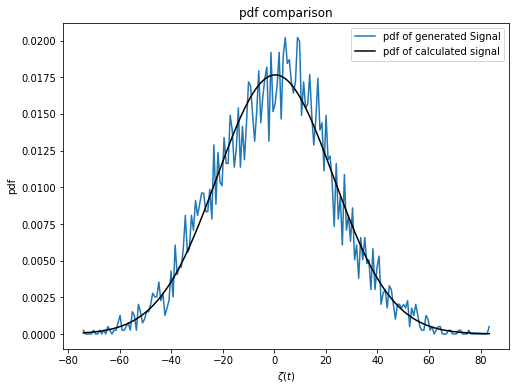

In [83]:
# Comparison with the pdf

# Mean of generated Signal
meanSignal = np.mean(fx_);
print('mean of generated Signal is:', meanSignal);

# Variance of generated Signal
varianceGeneratedSignal = R_tau[0];
print('variance of generated Signal is:', varianceGeneratedSignal);

# Frequency Plot generation for Noise
binsSize = 200;
hist, bins = np.histogram(fx_, bins = binsSize, density = True);
bin_centers = (bins[1:]+bins[:-1])*0.5;

# Plot pdf for calculated Signal
plt.figure(15).set_figwidth(8);
plt.figure(15).set_figheight(6);
plt.plot(bin_centers, hist);

# Pdf of original signal
x = np.linspace(min_element(bin_centers),max_element(bin_centers),binsSize);
xpdf = gaussian(x,meanSignal,varianceGeneratedSignal);
plt.plot(x,xpdf,'black');

# Set the plot title and labels
plt.title("pdf comparison");
plt.xlabel('$\zeta(t)$');
plt.ylabel("pdf");

# Set the legend
plt.legend(['pdf of generated Signal','pdf of calculated signal']);

# Show the plot
plt.show();

The target signal in the delta Correlated Process is given by, $<\zeta(t)\zeta(t-\tau)>=\Gamma\delta(\tau)$, where $\Gamma = 1$. 

The scatter plot for PSD of the simulated signal is not completely equal to but is a band, which lies between 0 to 1 (nearly). It is due to the uniform random phase that is added in the PSD while generating the random signal.

### 3. Carry out numerical integration for the noisy system and plot a few realizations for the time histories. Also estimate the pdf and PSD of the response. Comment on your observations and inferences.

In this question, we carry out Monte Carlo Simulation to simulate the given differntial equation for the random Variable X satisfying the given diffential equation including the noise term, using the method described in the above question. <br>
Here we again run the Runge Kutta 4th order method inorder to solve the actual diffential equation


In [84]:
# Noise simulation
def noise(T, Tau):
    # Limits of Omega
    wl = 0;  # Lower limit
    wu = 500;  # Upper limit

    # No of sample Points
    N = (wu - wl)*T;

    # Generate omegas
    w = np.linspace(wl, wu, N);

    # $\Delta \omega$
    delw = (wu - wl)/N;
    w0 = 12*np.pi;
    a = 4;
    s0 = (1/(math.atan(w0/a)))*(a/(w**2 + a**2));  

    # $\Delta \omega '$
    delwd = delw/20;
    k = np.arange(1,N+1);

    # Individual \omega_i and \omega'_i
    wk = wl + (k - 0.5)*delw;
    wkd = wk + np.random.uniform(-delwd/2, delwd/2, len(wk));

    # Phase
    phi_k = np.random.uniform(0,2*np.pi,len(wk));

    # Time sample
    t = np.linspace(0,N,N)/wu;
    lenSig = max(t);
    A = np.sqrt(s0[0:]*delw);

    # Reshaping into required form
    A = A.reshape(-1,1);
    wkd = wkd.reshape(-1,1);
    phi_k = phi_k.reshape(-1,1);
    t = t.reshape(1,-1);

    v0 = np.matmul(wkd, t);
    v = A*(np.cos(v0 + phi_k));
    fx = np.sqrt(2)*np.sum(v, axis = 0);
    fx_ = fx.reshape(fx.size,1);
    t_ = t.reshape(t.size,1);
    
    # \delta t
    dt = t_[1] - t_[0];
    lag = (int)(Tau//dt);

    # Calculate the autoCorrelation Function
    R_tau = autoCor(fx, lag);
    tau = np.linspace(0, Tau, lag);
    # PSD of Simulated Signal
    # Domain omega
    omega = np.linspace(0,wu,tau.size);
    sXX = np.array([]);

    # Numerical Integral
    stepSize = tau[1] - tau[0];
    for i in omega:
        Integral = R_tau*np.cos(i*tau);
        sXX = np.append(sXX,trapZ(Integral,stepSize));

    sXX = sXX/np.pi;
    return fx_, t_, omega, sXX, w, s0, R_tau;

# Probability Density Function
def pdf(fx_,binsSize, R_tau):
    hist, bins = np.histogram(fx_, bins = binsSize, density = True);
    bin_centers = (bins[1:]+bins[:-1])*0.53;
    
    meanSignal = np.mean(fx_);
    varianceGeneratedSignal = R_tau[0];
    
    print('mean of generated Signal is:', meanSignal);
    print('variance of generated Signal is:', varianceGeneratedSignal);
    
    xOrg = np.linspace(min_element(bin_centers),max_element(bin_centers),binsSize);
    xpdf = gaussian(xOrg,meanSignal,varianceGeneratedSignal);
    return hist, bin_centers, xOrg, xpdf;

def monte_carlo_simulation(T, Tau, binSize):
    fx_, t_, wXX, sXX, w0, s0, R_tau = noise(T,Tau);
    
    # Incremental Step size in rk4
    h = float(t_[-1]/(t_.shape[0]));
    
    #  Without Noise Solution
    x = runge_kutta_4th_order(dx_dt, t_, h, X0);
    x_ = runge_kutta_4th_order_noise(dx_dt_noise, t_, h, X0, e, (fx_.T)[0]);
    
    binSize = 500;
    hists,bin_centers, xOrg, xpdf = pdf(fx_,500, R_tau);
    return x, x_, t_, xOrg, xpdf, bin_centers, hists, w0, s0, wXX, sXX

Enter the value of epsilon:0.01
Enter the initial Value (<=0.5):0.1
Enter the time range:10
Maximum lag tau taken is:3
Oligotrophic state
e = 0.01
X0 = 0.1
T = 10
tau=3.0
1st Realization
mean of generated Signal is: 0.26128683305823863
variance of generated Signal is: 1.2909853219917262


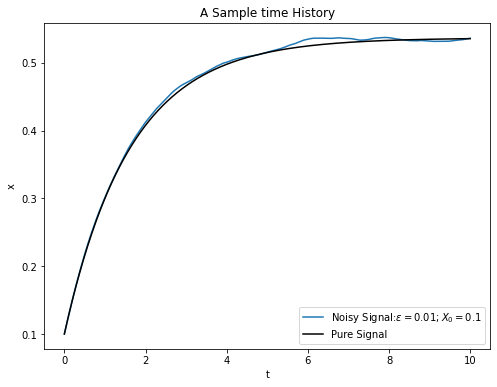

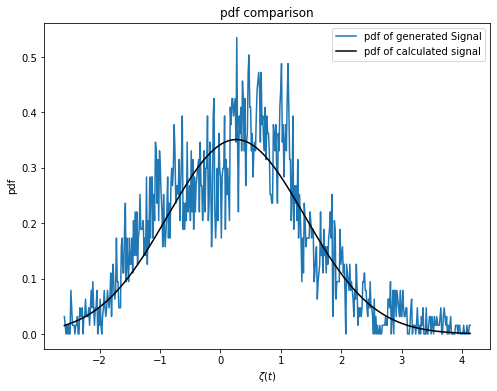

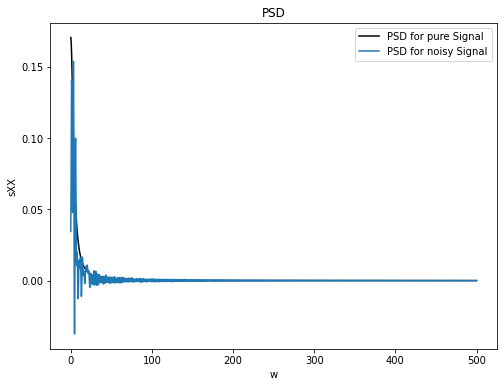

2nd Realization
mean of generated Signal is: -0.20115770870746502
variance of generated Signal is: 1.308627428157075


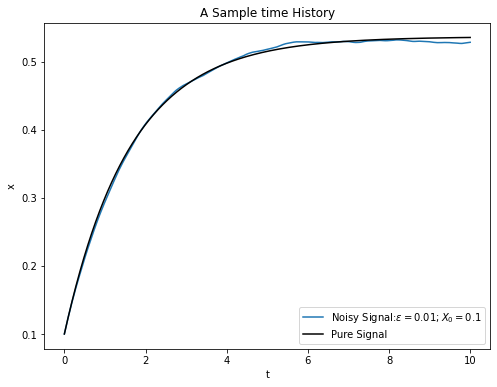

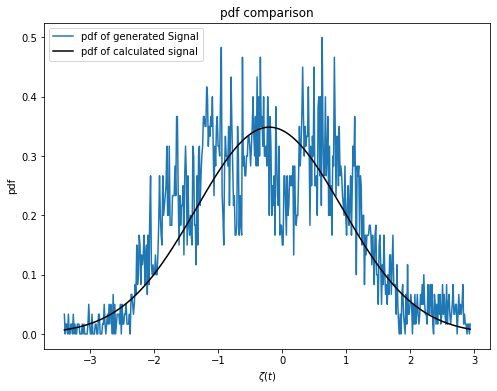

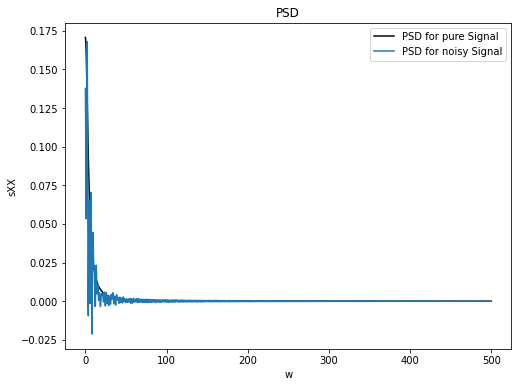

In [85]:
# Oligotrophic state
# Get the value of epsilon
e = float(input('Enter the value of epsilon:'));

# ICS
X0 = float(input('Enter the initial Value (<=0.5):'));

# Get the Time span
T = int(input('Enter the time range:'));

# Get the value of Tau
Tau = float(input(f'Maximum lag tau taken is:'));

# Print relevant details
print('Oligotrophic state');
print(f'e = {e}');
print(f'X0 = {X0}');
print(f'T = {T}');
print(f'tau={Tau}');

# 1st Realization
print('1st Realization');
binSize = 500;
x, x_, t_, idealPDF_x, idealPDF_y, simPDF_x, simPDF_y, w0, s0, wXX, sXX = monte_carlo_simulation(T, Tau, binSize);

# Plot a sample time history
plt.figure(16).set_figwidth(8)
plt.figure(16).set_figheight(6)
plt.plot(t_.T[0], x_, label=f'Noisy Signal:$\epsilon={e}; X_0={X0}$')
plt.plot(t_.T[0], x, 'black', label='Pure Signal')

# Add legend
plt.legend()

# Set the plot title and labels
plt.title('A Sample time History')
plt.xlabel('t')
plt.ylabel('x')

# Plot the pdf of x
plt.figure(17).set_figwidth(8)
plt.figure(17).set_figheight(6)
plt.plot(simPDF_x, simPDF_y)
plt.plot(idealPDF_x, idealPDF_y,'black')

# Set the plot title and labels
plt.title("pdf comparison")
plt.xlabel('$\zeta(t)$')
plt.ylabel("pdf")

# Set the legend
plt.legend(['pdf of generated Signal','pdf of calculated signal'])

# Plot the sXX
plt.figure(18).set_figwidth(8)
plt.figure(18).set_figheight(6)
plt.plot(w0, s0,'black', label='PSD for pure Signal')
plt.plot(wXX, sXX, label='PSD for noisy Signal')

# Add legend
plt.legend()

# Set the plot title and labels
plt.title("PSD")
plt.xlabel("w")
plt.ylabel("sXX")

# Show the plot
plt.show()

# 2nd Realization
print('2nd Realization')
binSize = 500;
x, x_, t_, idealPDF_x, idealPDF_y, simPDF_x, simPDF_y, w0, s0, wXX, sXX = monte_carlo_simulation(T, Tau, binSize);

# Plot a sample time history
plt.figure(19).set_figwidth(8)
plt.figure(19).set_figheight(6)
plt.plot(t_.T[0], x_, label=f'Noisy Signal:$\epsilon={e}; X_0={X0}$')
plt.plot(t_.T[0], x, 'black', label='Pure Signal')

# Add legend
plt.legend()

# Set the plot title and labels
plt.title('A Sample time History')
plt.xlabel('t')
plt.ylabel('x')

# Plot the pdf of x
plt.figure(20).set_figwidth(8)
plt.figure(20).set_figheight(6)
plt.plot(simPDF_x, simPDF_y)
plt.plot(idealPDF_x, idealPDF_y,'black')

# Set the plot title and labels
plt.title("pdf comparison")
plt.xlabel('$\zeta(t)$')
plt.ylabel("pdf")

# Set the legend
plt.legend(['pdf of generated Signal','pdf of calculated signal'])

# Plot the sXX
plt.figure(21).set_figwidth(8)
plt.figure(21).set_figheight(6)
plt.plot(w0, s0,'black', label='PSD for pure Signal')
plt.plot(wXX, sXX, label='PSD for noisy Signal')

# Add legend
plt.legend()

# Set the plot title and labels
plt.title("PSD")
plt.xlabel("w")
plt.ylabel("sXX")

# Show the plot
plt.show()

Enter the value of epsilon:0.1
Enter the initial Value (>=2):2
Enter the time range:10
Maximum lag tau taken is:3
Eutrophic state
e = 0.1
X0 = 2.0
T = 10
tau=3.0
1st Realization
mean of generated Signal is: 0.1870119424833266
variance of generated Signal is: 1.0638576067575425


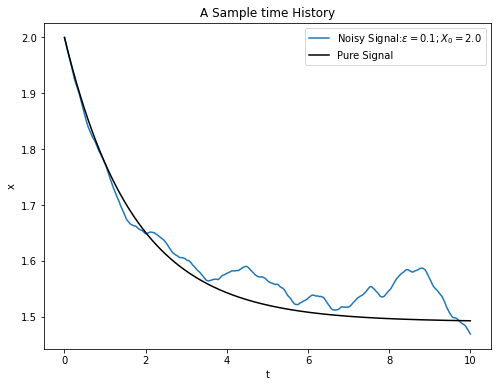

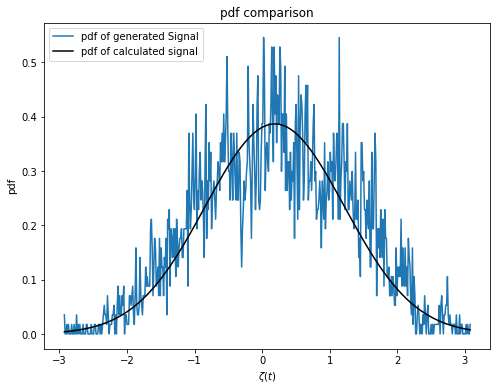

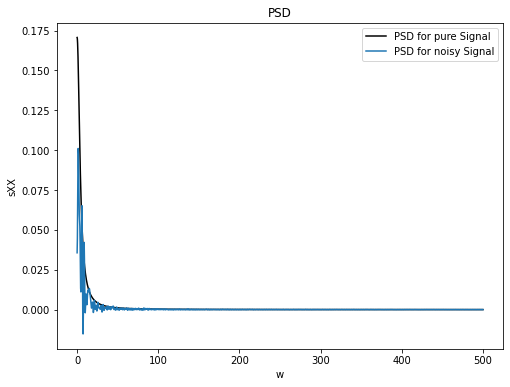

2nd Realization
mean of generated Signal is: -0.007865629875506455
variance of generated Signal is: 0.903441291002756


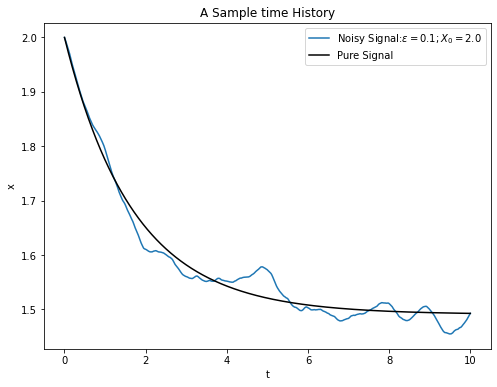

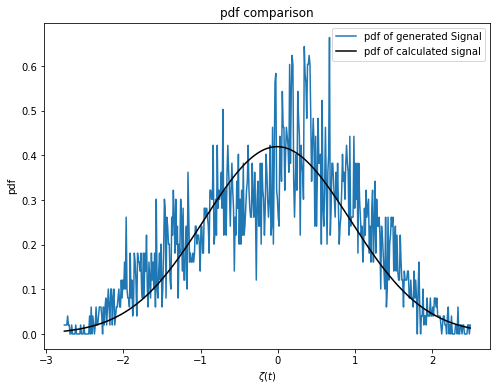

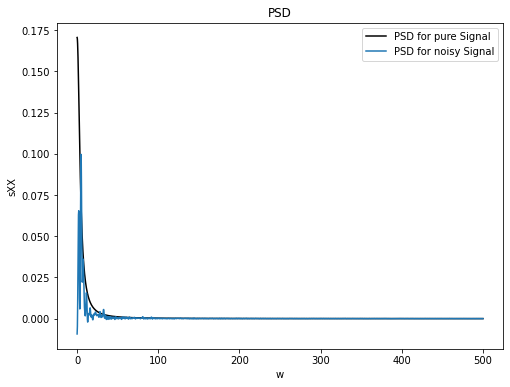

In [86]:
# Eutrophic state
# Get the value of epsilon
e = float(input('Enter the value of epsilon:'));

# ICS
X0 = float(input('Enter the initial Value (>=2):'));

# Get the Time span
T = int(input('Enter the time range:'));

# Get the value of Tau
Tau = float(input(f'Maximum lag tau taken is:'));

# Print relevant details
print('Eutrophic state');
print(f'e = {e}');
print(f'X0 = {X0}');
print(f'T = {T}');
print(f'tau={Tau}');

# 1st Realization
print('1st Realization');
binSize = 500;
x, x_, t_, idealPDF_x, idealPDF_y, simPDF_x, simPDF_y, w0, s0, wXX, sXX = monte_carlo_simulation(T, Tau, binSize);

# Plot a sample time history
plt.figure(16).set_figwidth(8)
plt.figure(16).set_figheight(6)
plt.plot(t_.T[0], x_, label=f'Noisy Signal:$\epsilon={e}; X_0={X0}$')
plt.plot(t_.T[0], x, 'black', label='Pure Signal')

# Add legend
plt.legend()

# Set the plot title and labels
plt.title('A Sample time History')
plt.xlabel('t')
plt.ylabel('x')

# Plot the pdf of x
plt.figure(17).set_figwidth(8)
plt.figure(17).set_figheight(6)
plt.plot(simPDF_x, simPDF_y)
plt.plot(idealPDF_x, idealPDF_y,'black')

# Set the plot title and labels
plt.title("pdf comparison")
plt.xlabel('$\zeta(t)$')
plt.ylabel("pdf")

# Set the legend
plt.legend(['pdf of generated Signal','pdf of calculated signal'])

# Plot the sXX
plt.figure(18).set_figwidth(8)
plt.figure(18).set_figheight(6)
plt.plot(w0, s0,'black', label='PSD for pure Signal')
plt.plot(wXX, sXX, label='PSD for noisy Signal')

# Add legend
plt.legend()

# Set the plot title and labels
plt.title("PSD")
plt.xlabel("w")
plt.ylabel("sXX")

# Show the plot
plt.show()

# 2nd Realization
print('2nd Realization')
binSize = 500;
x, x_, t_, idealPDF_x, idealPDF_y, simPDF_x, simPDF_y, w0, s0, wXX, sXX = monte_carlo_simulation(T, Tau, binSize);

# Plot a sample time history
plt.figure(19).set_figwidth(8)
plt.figure(19).set_figheight(6)
plt.plot(t_.T[0], x_, label=f'Noisy Signal:$\epsilon={e}; X_0={X0}$')
plt.plot(t_.T[0], x, 'black', label='Pure Signal')

# Add legend
plt.legend()

# Set the plot title and labels
plt.title('A Sample time History')
plt.xlabel('t')
plt.ylabel('x')

# Plot the pdf of x
plt.figure(20).set_figwidth(8)
plt.figure(20).set_figheight(6)
plt.plot(simPDF_x, simPDF_y)
plt.plot(idealPDF_x, idealPDF_y,'black')

# Set the plot title and labels
plt.title("pdf comparison")
plt.xlabel('$\zeta(t)$')
plt.ylabel("pdf")

# Set the legend
plt.legend(['pdf of generated Signal','pdf of calculated signal'])

# Plot the sXX
plt.figure(21).set_figwidth(8)
plt.figure(21).set_figheight(6)
plt.plot(w0, s0,'black', label='PSD for pure Signal')
plt.plot(wXX, sXX, label='PSD for noisy Signal')

# Add legend
plt.legend()

# Set the plot title and labels
plt.title("PSD")
plt.xlabel("w")
plt.ylabel("sXX")

# Show the plot
plt.show()

It can also be observed that, for relatively high value of $\epsilon$ (i.e. nearly 0.1), the signal very much deivates from the original one, as compared to low values such as $0.01$.


As discussed earlier, now we will see a transitional case, where the actual signal converges to the euttophic state (i.e. $X_{eqb} = 1.491$), where as the addition of noise subsequently makes it converge to the oligotorphic state (i.e. $X_{eqb} = 0.537$). This happens when the initial input is nearly 0.98.

Enter the time range:10
Maximum lag tau taken is:3
Transitional state
T = 10
tau=3.0
1st Realization
e = 0.1
X0 = 0.98
mean of generated Signal is: -0.11891975943953088
variance of generated Signal is: 0.9429659836612544


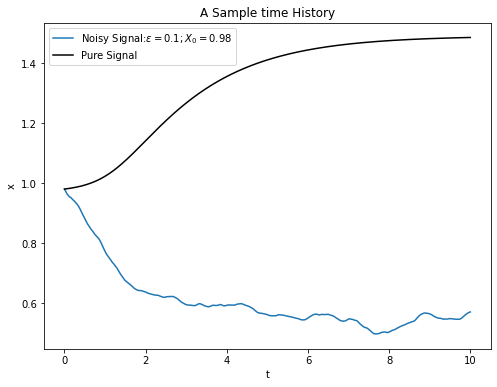

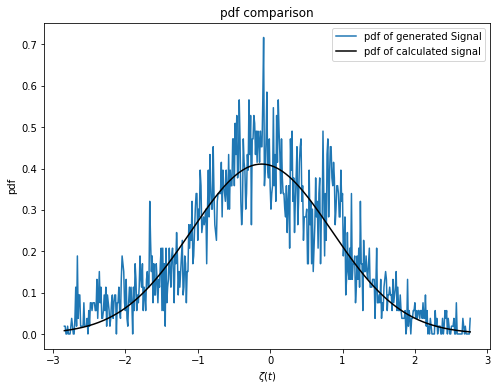

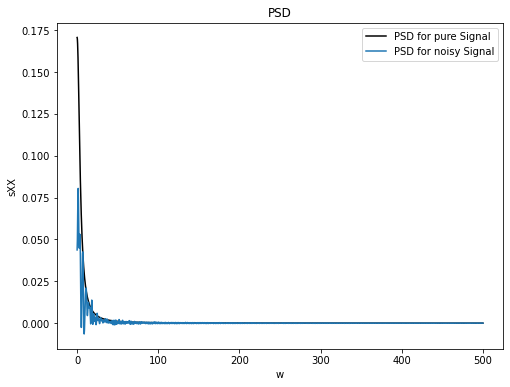

2nd Realization
1st Realization
e = 0.01
X0 = 0.98
mean of generated Signal is: 0.10218690311209588
variance of generated Signal is: 1.184104822468766


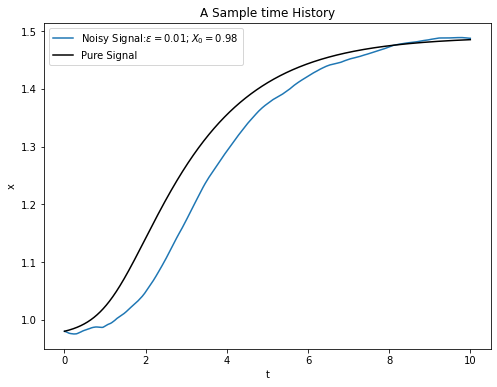

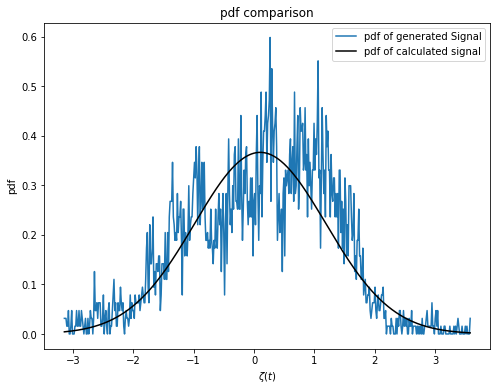

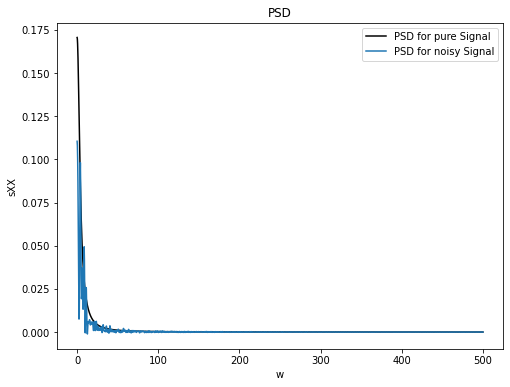

In [87]:
# Transitional state
# Get the Time span
T = int(input('Enter the time range:'));

# Get the value of Tau
Tau = float(input(f'Maximum lag tau taken is:'));

# Print relevant details
print('Transitional state');
print(f'T = {T}');
print(f'tau={Tau}');

# 1st Realization
# Get the value of epsilon
e = 0.1;

# ICS
X0 = 0.98;

print('1st Realization');
print(f'e = {e}');
print(f'X0 = {X0}')
binSize = 500;
x, x_, t_, idealPDF_x, idealPDF_y, simPDF_x, simPDF_y, w0, s0, wXX, sXX = monte_carlo_simulation(T, Tau, binSize);

# Plot a sample time history
plt.figure(16).set_figwidth(8)
plt.figure(16).set_figheight(6)
plt.plot(t_.T[0], x_, label=f'Noisy Signal:$\epsilon={e}; X_0={X0}$')
plt.plot(t_.T[0], x, 'black', label='Pure Signal')

# Add legend
plt.legend()

# Set the plot title and labels
plt.title('A Sample time History')
plt.xlabel('t')
plt.ylabel('x')

# Plot the pdf of x
plt.figure(17).set_figwidth(8)
plt.figure(17).set_figheight(6)
plt.plot(simPDF_x, simPDF_y)
plt.plot(idealPDF_x, idealPDF_y,'black')

# Set the plot title and labels
plt.title("pdf comparison")
plt.xlabel('$\zeta(t)$')
plt.ylabel("pdf")

# Set the legend
plt.legend(['pdf of generated Signal','pdf of calculated signal'])

# Plot the sXX
plt.figure(18).set_figwidth(8)
plt.figure(18).set_figheight(6)
plt.plot(w0, s0,'black', label='PSD for pure Signal')
plt.plot(wXX, sXX, label='PSD for noisy Signal')

# Add legend
plt.legend()

# Set the plot title and labels
plt.title("PSD")
plt.xlabel("w")
plt.ylabel("sXX")

# Show the plot
plt.show()

# 2nd Realization
print('2nd Realization')
# Get the value of epsilon
e = 0.01;

# ICS
X0 = 0.98;

print('1st Realization');
print(f'e = {e}');
print(f'X0 = {X0}')

binSize = 500;
x, x_, t_, idealPDF_x, idealPDF_y, simPDF_x, simPDF_y, w0, s0, wXX, sXX = monte_carlo_simulation(T, Tau, binSize);

# Plot a sample time history
plt.figure(19).set_figwidth(8)
plt.figure(19).set_figheight(6)
plt.plot(t_.T[0], x_, label=f'Noisy Signal:$\epsilon={e}; X_0={X0}$')
plt.plot(t_.T[0], x, 'black', label='Pure Signal')

# Add legend
plt.legend()

# Set the plot title and labels
plt.title('A Sample time History')
plt.xlabel('t')
plt.ylabel('x')

# Plot the pdf of x
plt.figure(20).set_figwidth(8)
plt.figure(20).set_figheight(6)
plt.plot(simPDF_x, simPDF_y)
plt.plot(idealPDF_x, idealPDF_y,'black')

# Set the plot title and labels
plt.title("pdf comparison")
plt.xlabel('$\zeta(t)$')
plt.ylabel("pdf")

# Set the legend
plt.legend(['pdf of generated Signal','pdf of calculated signal'])

# Plot the sXX
plt.figure(21).set_figwidth(8)
plt.figure(21).set_figheight(6)
plt.plot(w0, s0,'black', label='PSD for pure Signal')
plt.plot(wXX, sXX, label='PSD for noisy Signal')

# Add legend
plt.legend()

# Set the plot title and labels
plt.title("PSD")
plt.xlabel("w")
plt.ylabel("sXX")

# Show the plot
plt.show()

### 4. Fix some threshold values beyond which the state of the system is inadvisable. Using Monte Carlo simulations, estimate the probability of exceedance. Can you try and obtain an analytical approximation for the same? Comment.

To estimate the probability of exceedance using Monte Carlo simulations, we can simulate the lake eutrophication model multiple times with random noise and calculate the proportion of simulations where the system exceeds a given threshold.


Enter the value of epsilon:0.05
Enter the initial Value:2
Enter no. of simulations:1000
Enter the time range:10
Maximum lag tau taken is:3
th Value: 1.491
T: [10.]
Probability of Exceedance: 0.837
Expected No. of crossings: 919.81


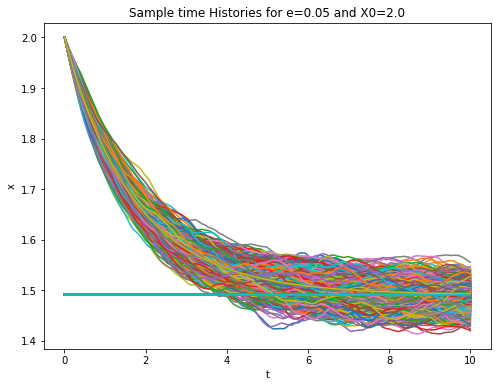

In [89]:
e = float(input('Enter the value of epsilon:'))
X0 = float(input('Enter the initial Value:'))
numOfSimulations = int(input('Enter no. of simulations:'))
T = int(input('Enter the time range:'))
TAU = float(input(f'Maximum lag tau taken is:'))

thValue = 0.537 if X0 <= 0.970546875 else 1.491
    
if(thValue == 0.537):
    print('th Value:', thValue)
    exceedanceCount = 0
    NoOfExceedance = 0
    for i in range(numOfSimulations):
        check = True
        fx_, t_, wXX, sXX, w0, s0, R_tau = noise(T,TAU)
        h = float(t_[-1]/(t_.shape[0]))

        x = runge_kutta_4th_order(dx_dt, t_, h, X0)
        x_ = runge_kutta_4th_order_noise(dx_dt_noise, t_, h, X0, e, (fx_.T)[0])
        # Plot a sample time history
        plt.figure(34).set_figwidth(8)
        plt.figure(34).set_figheight(6)
        plt.plot(t_.T[0], x_, label=f'Noisy Signal:$\epsilon={e}; X_0={X0}$')
        plt.plot(t_.T[0], x, label='Pure Signal')
        X = thValue*np.ones(t_.shape)
        plt.plot(t_.T[0],X, label=f'Threshold Value={thValue}')

        # Set the plot title and labels
        plt.title(f'Sample time Histories for e={e} and X0={X0}')
        plt.xlabel('t')
        plt.ylabel('x')
        for j in x_:
            if j > thValue:
                NoOfExceedance += 1
                if check:
                    exceedanceCount += 1
                    check = False
    
    probabilityOfExceedance = exceedanceCount / numOfSimulations
    expectedNoOfExceedance = float(NoOfExceedance) / float(numOfSimulations)
    print('T:', t_[-1])
    print('Probability of Exceedance:', probabilityOfExceedance)
    print('Expected No. of crossings:', expectedNoOfExceedance)
else:
    print('th Value:', thValue)
    exceedanceCount = 0
    NoOfExceedance = 0
    for i in range(numOfSimulations):
        check = True
        fx_, t_, wXX, sXX, w0, s0, R_tau = noise(T,TAU)
        h = float(t_[-1]/(t_.shape[0]))

        x = runge_kutta_4th_order(dx_dt, t_, h, X0)
        x_ = runge_kutta_4th_order_noise(dx_dt_noise, t_, h, X0, e, (fx_.T)[0])
        # Plot a sample time history
        plt.figure(34).set_figwidth(8)
        plt.figure(34).set_figheight(6)
        plt.plot(t_.T[0], x_, label=f'Noisy Signal:$\epsilon={e}; X_0={X0}$')
        plt.plot(t_.T[0], x, label='Pure Signal')
        X = thValue*np.ones(t_.shape)
        plt.plot(t_.T[0],X, label=f'Threshold Value={thValue}')

        # Set the plot title and labels
        plt.title(f'Sample time Histories for e={e} and X0={X0}')
        plt.xlabel('t')
        plt.ylabel('x')
        for j in x_:
            if j < thValue:
                NoOfExceedance += 1
                if check:
                    exceedanceCount += 1
                    check = False
    
    probabilityOfExceedance = exceedanceCount / numOfSimulations
    expectedNoOfExceedance = float(NoOfExceedance) / float(numOfSimulations)
    print('T:', t_[-1])
    print('Probability of Exceedance:', probabilityOfExceedance)
    print('Expected No. of crossings:', expectedNoOfExceedance)

### 5. Obtain an expression for the response of the noisy system in terms of polynomial chaos expansion.

The representation of Random Processes using the well known Wiener- hermite Polynomial Chaos expansion is given as:
$$Y(\boldsymbol{x},t;\theta) = \sum_{k=0}^{\infty}{c_k(\boldsymbol{x},t)\mathcal{\boldsymbol{\Psi_k}}(\xi(\theta)) }$$, where <br>
$Y:$ Random Process<br>
$\theta:$ Stochastic dimension <br>
$c_i:$ determinstic Coefficients <br>
$\Psi_i:$ ploynomial Chaos (which is hermite when $\xi$ is gaussian)


While this can be solved using the Galerkin intrusive spectral proection procedure as follows:<br>
The parameters for this system can be taken as $s = 1$, $r = 1$, $x_o = 1$, $q = 8$ and $c = 0.53$. The noise free system has two equilibria (where $\dot{x} = 0$) at $x = 0.537$ and at $x = 1.491$ corresponding to oligotrophic states and eutrophic states. $\epsilon$ and $x_0$ are the user inputs.

<ol>
  <li>Start with ODE: $$ \dot{x} = c - sx + r\frac{x^q}{x_o^q+x^q} + \epsilon\zeta(t)$$</li>
  <li>Express $x(t)$ and $\zeta(t)$ using PCE expressions. (Since $\zeta(t)$ is a gaussian R.V., hence here $\Psi_k(\alpha)$ represents a hermite polynomial of order k.) $$x(t) = \sum_{k=0}^{L}{c_k(t) \Psi_k(\zeta(t)})$$ $$\zeta(t) = \sum_{k=0}^{L}{d_k \Psi_k(\zeta(t))}$$
  Note that for the second equation $d_1 = 1$ as $\Psi_1(\alpha) = \alpha$ and $d_i = 0$ $\forall i \in \{0, 1, 2 \dots L\} - \{1\}$ </li>
  <li>Throw the PCE to the ODE: $$\frac{d}{dt} \left( \sum_{k=0}^{L}{c_k(t) \Psi_k(\zeta(t)}) \right) =  c - s\sum_{k=0}^{L}{c_k(t) \Psi_k(\zeta(t)}) + r\frac{(\sum_{k=0}^{L}{c_k(t) \Psi_k(\zeta(t)}))^q}{x_o^q+(\sum_{k=0}^{L}{c_k(t) \Psi_k(\zeta(t)}))^q} + \epsilon \sum_{k=0}^{L}{d_k \Psi_k(\zeta(t))}$$ Life seems complicated.</li>
</ol>
Since the equation is a nonlinear one, we have to use the non-intrusive Galerkin Spectral Projection.
$$Y(\boldsymbol{x},t;\theta) = \sum_{k=0}^{\infty}{c_k(\boldsymbol{x},t)\mathcal{\boldsymbol{\Psi_k}}(\xi(\theta)) }$$
$$<Y(\boldsymbol{x},t;\theta) \mathcal{\boldsymbol{\Psi_i}}(\xi(\theta)) > = \sum_{k=0}^{\infty}{c_k<(\boldsymbol{x},t)\mathcal{\boldsymbol{\Psi_k}}(\xi(\theta)) \mathcal{\boldsymbol{\Psi_i}}(\xi(\theta)) >} $$
$$< Y(\boldsymbol{x},t;\theta) \mathcal{\boldsymbol{\Psi_i}}(\xi(\theta)) >= {c_i(\boldsymbol{x},t)<\mathcal{\boldsymbol{\Psi_i}}(\xi(\theta)) \mathcal{\boldsymbol{\Psi_i}}(\xi(\theta)) >} $$
$$c_i(\boldsymbol{x},t) = \frac{< Y(\boldsymbol{x},t;\theta) \mathcal{\boldsymbol{\Psi_i}}(\xi(\theta))>}{ <\mathcal{\boldsymbol{\Psi_i}}(\xi(\theta)) \mathcal{\boldsymbol{\Psi_i}}(\xi(\theta)) >} =  \frac{1}{<\Psi_i^2(\xi(\theta))>} \int_{\boldsymbol{\Omega}}{Y(\boldsymbol{x},t;\theta) \mathcal{\boldsymbol{\Psi_i}}(\xi(\theta)) p_\xi(\xi) d\xi}$$, which we can compute numerically, which seems a little bit challenging considering the fact that in our case $X_0$ and $\epsilon$ are the user input.



Now we are considering to develope the PCE model using least square regression using chaospy. We will assume the involvement of hermite polynomial till order 4 and we will perform gradient descent to obtain the required coefficients.


$$X(t) = c_0H_0(\xi(t))\sum_{i=1}^{\infty}{c_iH_1(\xi(t))} + \sum_{i=1}^{\infty}\sum_{j=i}^{\infty}{c_{ij}H_2(\xi_i(t),\xi_j(t))} + \sum_{i=1}^{\infty}\sum_{j=i}^{\infty}\sum_{k=j}^{\infty}{c_{ijk}H_3(\xi_i(t),\xi_j(t),\xi_k(t))}$$

<b> References: </b>
<ol>
  <li><a href="http://www.openeering.com/sites/default/files/Polynomial_Chaos_Expansion_with_applications_to_PDEs.pdf">Polynomial Chaos Expansion with applications to PDEs</a></li>
  <li><a href="https://www.youtube.com/watch?v=ZoTF1P1e9e0">Uncertainty Quantification of Nonlinear Systems</a></li>
  <li><a href="https://chaospy.readthedocs.io/en/master/user_guide/advanced_topics/generalized_polynomial_chaos.html">chaospy</a></li>
</ol>

In [107]:
def model(parameters,epsilon,X0):
    e = parameters*epsilon
    fx_, t_, wXX, sXX, w0, s0, R_tau = noise(10,3)
    h = float(t_[-1]/(t_.shape[0]))

    x_ = runge_kutta_4th_order_noise(dx_dt_noise, t_, h, X0, e, (fx_.T)[0])
    return x_

def pce(T,varianceZeta,epsilon,X0,orderOfPCE):
    coordinates = np.linspace(0, T, 1000)
    distribution_r = cp.J(cp.Normal(0, 1))
    samples_r = distribution_r.sample(100, rule="sobol")
    expansion = cp.generate_expansion(orderOfPCE, distribution_r)
    evaluations = np.array([model(sample,epsilon,X0) for sample in samples_r.T])
    model_approx = cp.fit_regression(expansion, samples_r, evaluations)
    print('model_approx:',model_approx)
    print('model_approx.shape:',model_approx.shape)
    mean = cp.E(model_approx, distribution_r)
    std = cp.Std(model_approx, distribution_r)
    coordinates = np.linspace(0, T, 5000)
    (mean[:5].round(5), std[:5].round(5))
    plt.figure(1).set_figwidth(8);
    plt.figure(1).set_figheight(6);
    plt.fill_between(coordinates, mean-std, mean+std, alpha=0.6)
    plt.plot(coordinates, mean, 'black')
    plt.figure(2).set_figwidth(8);
    plt.figure(2).set_figheight(6);
    plt.plot(coordinates, mean)
    plt.show()

model_approx: [1.0300905889417256e-16*q0**7-2.505202380961623e-16*q0**6-2.468859433300211e-15*q0**5+3.97813138707902e-15*q0**4+1.3154224032017052e-14*q0**3-1.2281576839511439e-14*q0**2-1.265614814708107e-14*q0+2.0000000000000027
 -8.234899382230606e-07*q0**7+4.422588825892678e-07*q0**6+6.553910879932004e-06*q0**5-4.048407742551702e-06*q0**4-1.119667987789055e-05*q0**3+7.3525113039609025e-06*q0**2+2.7335737021959e-06*q0+1.9993980233067432
 -1.6948088312742496e-06*q0**7+9.808900655451954e-07*q0**6+1.3408669297583292e-05*q0**5-8.794866783533669e-06*q0**4-2.2938368397971962e-05*q0**3+1.5855808392106835e-05*q0**2+5.984532500190808e-06*q0+1.9987966446952445
 ...
 0.0003433134909794078*q0**7-5.623698208009767e-05*q0**6-0.0031339424863510755*q0**5+0.0006676620180704616*q0**4+0.006756435240370621*q0**3-0.0006015784523257617*q0**2-0.0026484677541869783*q0+1.4924871943858435
 0.00034260233795774427*q0**7-5.706114568323475e-05*q0**6-0.0031289101811812414*q0**5+0.0006722214849702612*q0**4+0.0067469

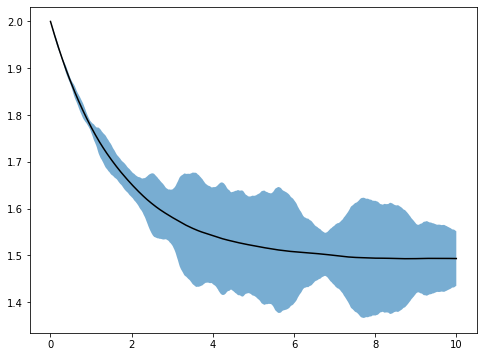

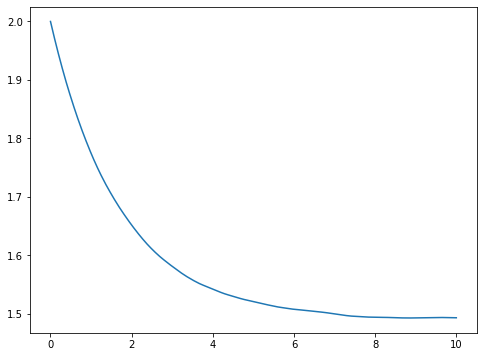

In [108]:
pce(10,2,0.01,2,7)

model_approx: [1.0300905889417256e-16*q0**7-2.505202380961623e-16*q0**6-2.468859433300211e-15*q0**5+3.97813138707902e-15*q0**4+1.3154224032017052e-14*q0**3-1.2281576839511439e-14*q0**2-1.265614814708107e-14*q0+2.0000000000000027
 1.0498337065498837e-05*q0**7+2.3084153793469453e-06*q0**6-8.74356589082107e-05*q0**5-2.4991333089771597e-05*q0**4+0.0001862926504977961*q0**3+2.4014946963572675e-05*q0**2-7.975800260048415e-05*q0+1.9993942029770333
 2.1102071181080726e-05*q0**7+3.5507635954198913e-06*q0**6-0.00017601699294496337*q0**5-4.308531677300996e-05*q0**4+0.00037693163106595616*q0**3+3.695705829914942e-05*q0**2-0.00016077619723948457*q0+1.9987903176513846
 ...
 -0.0012107266769623565*q0**7-0.0006055452653912063*q0**6+0.006095227061536496*q0**5+0.004385364630442728*q0**4+0.004679800291484043*q0**3-0.013433555095782895*q0**2-0.0009626377064269886*q0+1.4961150368517961
 -0.0012291927059223141*q0**7-0.0006046097341114581*q0**6+0.006224244949726766*q0**5+0.004415410675018312*q0**4+0.00445450

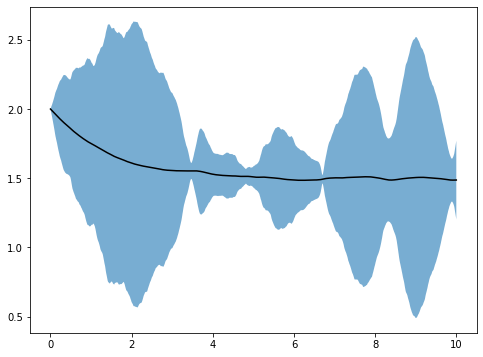

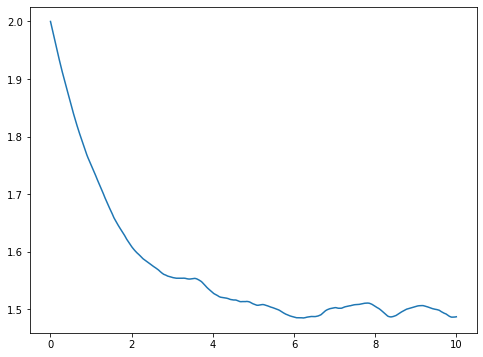

In [109]:
pce(10,2,0.1,2,7)

X axis: time <br>
Y axis: mean of realizations with a color band of + - std deviation of generated PCE samples over number of realizations.<br>
We have ploted the PCE for $X0 = 2$, $T = 10$, $\epsilon = 0.01$ and $0.1$ respectively and we are considering upto 7th order of hermite polynomials.
We have plotted the mean of the generated PCEs with a $\+-$ std deviation of the generated samples. We can observe that we can have a large std deviation for the second diagram where the value of $\epsilon$ is 0.1. The variable model_approx shows different approximated polynomial upto order 7 the actual system when we take the mean over a large no of realizations. And the mean actually matches the pure signal since our error is a mean zero gaussian process in the differntial equation.

### 6. Carry out MCS using your PCE surrogate model to estimate the probability of exceedance. Compare your results with your earlier observations. Comment on the accuracy and efficiency of your PCE based simulations.

In [118]:
def pce_samples(T,varianceZeta,epsilon,X0,orderOfPCE):
    coordinates = np.linspace(0, T, 1000)
    distribution_r = cp.J(cp.Normal(0, 1))
    samples_r = distribution_r.sample(100, rule="sobol")
    expansion = cp.generate_expansion(orderOfPCE, distribution_r)
    evaluations = np.array([model(sample,epsilon,X0) for sample in samples_r.T])
    model_approx = cp.fit_regression(expansion, samples_r, evaluations)
    mean = cp.E(model_approx, distribution_r)
    std = cp.Std(model_approx, distribution_r)
    # Define the number of Monte Carlo samples
    num_samples = 10

    # Generate Monte Carlo samples from the distribution
    monte_carlo_samples = distribution_r.sample(num_samples, rule="random")

    # Evaluate the model_approx for each Monte Carlo sample
    monte_carlo_outputs = np.array([model_approx(sample) for sample in monte_carlo_samples.T])
    monte_carlo_outputs
    
    return monte_carlo_outputs

z = pce_samples(10,2,0.01,2,7)
X0 = 2
thValue = 0.537 if X0 <= 0.970546875 else 1.491
z

array([[2.        , 1.99939824, 1.99879714, ..., 1.49239001, 1.49238921,
        1.49238824],
       [2.        , 1.99939873, 1.99879818, ..., 1.49259617, 1.49259432,
        1.49259228],
       [2.        , 1.99939918, 1.99879912, ..., 1.49278056, 1.49277793,
        1.4927751 ],
       ...,
       [2.        , 1.99939873, 1.99879843, ..., 1.49550566, 1.49549465,
        1.49548319],
       [2.        , 1.99939768, 1.99879582, ..., 1.49344958, 1.49344668,
        1.49344413],
       [2.        , 1.99939871, 1.99879801, ..., 1.49255276, 1.49255286,
        1.49255307]])

In [119]:
print(z)
print(z.shape)

[[2.         1.99939824 1.99879714 ... 1.49239001 1.49238921 1.49238824]
 [2.         1.99939873 1.99879818 ... 1.49259617 1.49259432 1.49259228]
 [2.         1.99939918 1.99879912 ... 1.49278056 1.49277793 1.4927751 ]
 ...
 [2.         1.99939873 1.99879843 ... 1.49550566 1.49549465 1.49548319]
 [2.         1.99939768 1.99879582 ... 1.49344958 1.49344668 1.49344413]
 [2.         1.99939871 1.99879801 ... 1.49255276 1.49255286 1.49255307]]
(10, 5000)


th Value: 1.491
T: 10.0
Probability of Exceedance: 0.0
Expected No. of crossings: 0.0


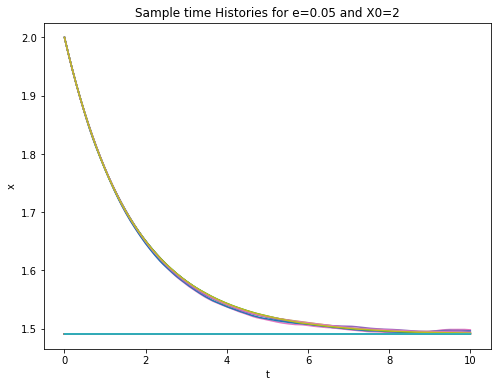

In [120]:
if(thValue == 0.537):
    print('th Value:', thValue)
    exceedanceCount = 0
    NoOfExceedance = 0
    for i in range(z.shape[0]):
        check = True
        t_ = numpy.linspace(0, 10, 5000)   
        x_ = z[i]
        # Plot a sample time history
        plt.figure(34).set_figwidth(8)
        plt.figure(34).set_figheight(6)
        plt.plot(t_, x_, label=f'Noisy Signal:$\epsilon={e}; X_0={X0}$')
        X = thValue*np.ones(t_.shape)
        plt.plot(t_,X, label=f'Threshold Value={thValue}')

        # Set the plot title and labels
        plt.title(f'Sample time Histories for e={e} and X0={X0}')
        plt.xlabel('t')
        plt.ylabel('x')
        for j in x_:
            if j > thValue:
                NoOfExceedance += 1
                if check:
                    exceedanceCount += 1
                    check = False
    
    probabilityOfExceedance = exceedanceCount / numOfSimulations
    expectedNoOfExceedance = float(NoOfExceedance) / float(numOfSimulations)
    print('T:', t_[-1])
    print('Probability of Exceedance:', probabilityOfExceedance)
    print('Expected No. of crossings:', expectedNoOfExceedance)
else:
    print('th Value:', thValue)
    exceedanceCount = 0
    NoOfExceedance = 0
    for i in range(z.shape[0]):
        check = True
        t_ = np.linspace(0, 10, 5000)       
        x_ = z[i]
        # Plot a sample time history
        plt.figure(34).set_figwidth(8)
        plt.figure(34).set_figheight(6)
        plt.plot(t_, x_, label=f'Noisy Signal:$\epsilon={e}; X_0={X0}$')
        X = thValue*np.ones(t_.shape)
        plt.plot(t_,X, label=f'Threshold Value={thValue}')

        # Set the plot title and labels
        plt.title(f'Sample time Histories for e={e} and X0={X0}')
        plt.xlabel('t')
        plt.ylabel('x')
        for j in x_:
            if j < thValue:
                NoOfExceedance += 1
                if check:
                    exceedanceCount += 1
                    check = False
    
    probabilityOfExceedance = exceedanceCount / numOfSimulations
    expectedNoOfExceedance = float(NoOfExceedance) / float(numOfSimulations)
    print('T:', t_[-1])
    print('Probability of Exceedance:', probabilityOfExceedance)
    print('Expected No. of crossings:', expectedNoOfExceedance)

PCE sometimes generate pretty horrible results, since after all we are just truncating it. But still we can observe that the result quite matches with normal MCS.


PCE is pretty faster, since we have the surrogate model for given $X0$ and $\epsilon$, but it may not be accurate.
MCS is slower to simulate 1000 realizations. But they produce acceptable results.


### 7. Plot a figure showing the variation of probability of exceedance with $\epsilon$. Comment on your observations.

In [ ]:
def probabilityOfExceedence(X0, T, Tau, noOfSimulations):
    thValue = 0.537 if X0 <= 0.970546875 else 1.491
    print('th Value:', thValue)
    E = np.linspace(0,0.1,100)
    pOE = np.array([])
    for e in E: 
        if(thValue == 0.537):
            exceedanceCount = 0
            NoOfExceedance = 0
            for i in range(numOfSimulations):
                check = True
                fx_, t_, wXX, sXX, w0, s0, R_tau = noise(T,Tau)
                h = float(t_[-1]/(t_.shape[0]))
                x_ = runge_kutta_4th_order_noise(dx_dt_noise, t_, h, X0, e, (fx_.T)[0])
                for j in x_:
                    if j > thValue:
                        NoOfExceedance += 1
                        if check:
                            exceedanceCount += 1
                            check = False

            probabilityOfExceedance = exceedanceCount / numOfSimulations
            pOE = np.append(pOE,probabilityOfExceedance)
            expectedNoOfExceedance = float(NoOfExceedance) / float(numOfSimulations)

        else:
            exceedanceCount = 0
            NoOfExceedance = 0
            for i in range(numOfSimulations):
                check = True
                fx_, t_, wXX, sXX, w0, s0, R_tau = noise(T,Tau)
                h = float(t_[-1]/(t_.shape[0]))
                x_ = runge_kutta_4th_order_noise(dx_dt_noise, t_, h, X0, e, (fx_.T)[0])
                for j in x_:
                    if j < thValue:
                        NoOfExceedance += 1
                        if check:
                            exceedanceCount += 1
                            check = False

            probabilityOfExceedance = exceedanceCount / numOfSimulations
            pOE = np.append(pOE,probabilityOfExceedance)
            expectedNoOfExceedance = float(NoOfExceedance) / float(numOfSimulations)
    print(E)
    print(pOE)
    plt.scatter(E,pOE)
    plt.figure(1).set_figwidth(8);
    plt.figure(1).set_figheight(6);
    plt.show()
probabilityOfExceedence(2, 10, 3, 50)

th Value: 1.491


X Axis: $\epsilon$<br>
Y Axis: Probabilty of exceedence.<br>
Here we have plotted for $X0 = 2$ with $T = 10$.<br>
We have performed 50 MCSs.<br>
As we can observe, the probability of exceedence becomes closer and closer to 1 as $\epsilon$ becomes closer to closer to $0.1$.